In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['box', 'sample', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [32]:
%load_ext autoreload
%autoreload 2
from initPixelAnalysis import *
from PixelEM import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def tiles2AreaMask(sample, objid,clustid=""):
    tiles = pkl.load(open("pixel_em/{}/obj{}/clust{}/tiles.pkl".format(sample, objid,cluster_id)))
    mega_mask = pkl.load(open("pixel_em/{}/obj{}/mega_mask.pkl".format(sample, objid)))
    tarea = [len(t) for t in tiles]
    mask = np.zeros_like(mega_mask)
    for tidx in range(len(tiles)):
        for i in list(tiles[tidx]):
                mask[i] = np.log10(tarea[tidx])
    return mask

In [13]:
sample ='25workers_rand0'
objid = 21
cluster_id = 0
tiles = pkl.load(open("pixel_em/{}/obj{}/clust{}/tiles.pkl".format(sample, objid,cluster_id)))

In [14]:
mask = tiles2AreaMask('25workers_rand0',21,0)

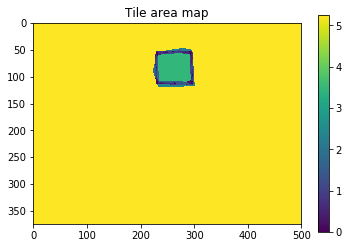

In [15]:
plt.figure()
plt.imshow(mask)
plt.title("Tile area map")
plt.colorbar()

In [16]:
sample ='25workers_rand0'
objid = 21
cluster_id = 1
tiles2 = pkl.load(open("pixel_em/{}/obj{}/clust{}/tiles.pkl".format(sample, objid,cluster_id)))

In [17]:
mask = tiles2AreaMask('25workers_rand0',21,0)

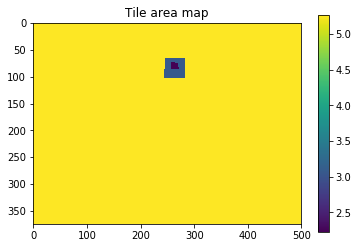

In [18]:
plt.figure()
plt.imshow(mask)
plt.title("Tile area map")
plt.colorbar()

# Examining result of Ground Truth EM 

In [47]:
# pkl.load(open("pixel_em/15workers_rand0/obj1/clust0/"))

In [49]:
sample = '25workers_rand0'
objid=4
thresh_lst =[-4, -2, 0, 2, 4]

In [50]:
gt = deriveGTinGroundTruthExperiments(sample, objid, algo="basic",cluster_id=0,thresh_lst= thresh_lst, exclude_isovote=False)

p,r,j: 0.94647716964 0.948484848485 0.90020132298
p,r,j: 0.946682823387 0.94696969697 0.899021864212
p,r,j: 0.946650500152 0.946363636364 0.898446490219
p,r,j: 0.946650500152 0.946363636364 0.898446490219
p,r,j: 0.948616600791 0.945454545455 0.899394638224


In [51]:
gt = deriveGTinGroundTruthExperiments(sample, objid, algo="basic",cluster_id=1,thresh_lst= thresh_lst, exclude_isovote=False)

p,r,j: 0.431032125769 0.955454545455 0.42254087376
p,r,j: 0.431032125769 0.955454545455 0.42254087376
p,r,j: 0.447659203257 0.93303030303 0.433723059586
p,r,j: 0.447769953052 0.924848484848 0.432049830125
p,r,j: 0.447769953052 0.924848484848 0.432049830125


In [44]:
f= pkl.load(open("pixel_em/5workers_rand0/obj1/clust1/mega_mask.pkl"))

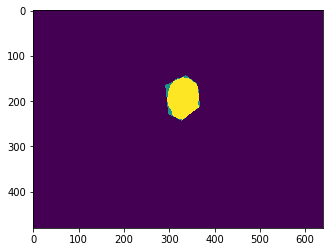

In [45]:
plt.imshow(f)

#### GTLSA for the second cluster has a stranger area cutoff

In [53]:
gt = deriveGTinGroundTruthExperiments(sample, objid, algo="GTLSA",cluster_id=0,thresh_lst= thresh_lst, exclude_isovote=False)

p,r,j: 0.947132616487 0.960909090909 0.911993097498
p,r,j: 0.949577294686 0.95303030303 0.90712431497
p,r,j: 0.952626784087 0.950606060606 0.907696759259
p,r,j: 0.958358848745 0.948484848485 0.910942956927
p,r,j: 0.962859795729 0.942727272727 0.909649122807


In [54]:
gt = deriveGTinGroundTruthExperiments(sample, objid, algo="GTLSA",cluster_id=1,thresh_lst= thresh_lst, exclude_isovote=False)

p,r,j: 0.0106757742297 0.993636363636 0.0106750443573
p,r,j: 0.0106757742297 0.993636363636 0.0106750443573
p,r,j: 0.010602029885 0.986666666667 0.0106005111426
p,r,j: 0.447769953052 0.924848484848 0.432049830125
p,r,j: 0.447769953052 0.924848484848 0.432049830125


# Modifying compile_PR 

In [97]:
obj_path ==  '/srv/data/home/jlee782/segmentation/analysis/pixel_em/15workers_rand5/obj47/'

True

In [95]:
glob.glob("{}/clust*".format(obj_path))+[obj_path]

['/srv/data/home/jlee782/segmentation/analysis/pixel_em/15workers_rand5/obj47/clust0',
 '/srv/data/home/jlee782/segmentation/analysis/pixel_em/15workers_rand5/obj47/clust1',
 '/srv/data/home/jlee782/segmentation/analysis/pixel_em/15workers_rand5/obj47/clust2',
 '/srv/data/home/jlee782/segmentation/analysis/pixel_em/15workers_rand5/obj47/']

In [112]:
# def compile_PR(mode="",ground_truth=False):
mode = "basic"
ground_truth = True
import glob
import csv
if ground_truth :
    fname = '{}{}_ground_truth_full_PRJ_table1.csv'.format(PIXEL_EM_DIR,mode)
else:
    fname  = '{}{}_full_PRJ_table.csv'.format(PIXEL_EM_DIR,mode)
with open(fname, 'w') as csvfile:
    if mode=="":
        fieldnames = ['num_workers', 'sample_num', 'objid', 'thresh', 'clust','MV_precision', 'MV_recall','MV_jaccard', 'EM_precision', 'EM_recall','EM_jaccard']
    else: # no MV columns
        fieldnames = ['num_workers', 'sample_num', 'objid', 'thresh','clust', 'EM_precision', 'EM_recall','EM_jaccard']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for sample_path in glob.glob('{}*_rand*/'.format(PIXEL_EM_DIR)):
        sample_name = sample_path.split('/')[-2]
        print "Working on ", sample_path
        num_workers = int(sample_name.split('w')[0])
        sample_num = int(sample_name.split('d')[-1])
        for obj_path in glob.glob('{}obj*/'.format(sample_path)):
            objid = int(obj_path.split('/')[-2].split('j')[1])
            for clust_path in glob.glob("{}/clust*/".format(obj_path))+[obj_path]:
                # clust_path includes both original obj_path and the paths with clust*/ on it
                if clust_path ==obj_path:
                    cluster_id = -1 #unclustered flag
                else:
                    cluster_id = int(clust_path.split("/clust")[-1][:-1])            
                mv_p = None
                mv_r = None
                mv_j = None
                em_p = None
                em_r = None
                em_j = None
                if ground_truth :
                    glob_path =glob.glob('{}{}_ground_truth_EM_prj_thresh*.json'.format(clust_path,mode))
                else:
                    glob_path = glob.glob('{}{}_EM_prj_iter4_thresh*.json'.format(clust_path,mode))
                if mode =="":
                    mv_pr_file = '{}MV_prj.json'.format(clust_path)
                    if os.path.isfile(mv_pr_file):
                        [mv_p, mv_r,mv_j] = json.load(open(mv_pr_file))
                for thresh_path in glob_path:
                    thresh= float(thresh_path.split('/')[-1].split('thresh')[1].split('.json')[0])
                    #thresh= int(thresh_path.split('/')[-1].split('thresh')[1].split('.')[0])
                    #thresh= int(thresh_path.split('thresh')[1].split('.')[0])
                    if thresh.is_integer():
                        thresh = int(thresh)
                    if ground_truth :
                        em_pr_file = '{}{}_ground_truth_EM_prj_thresh{}.json'.format(clust_path,mode,thresh)
                    else:
                        em_pr_file = '{}{}_EM_prj_iter4_thresh{}.json'.format(clust_path,mode,thresh)
                    if os.path.isfile(em_pr_file):
                        [em_p, em_r,em_j] = json.load(open(em_pr_file))
                    if any([prj is not None for prj in [mv_p, mv_r, mv_j, em_p, em_r,em_j]]):
                        if mode =="":
                            writer.writerow(
                                  {
                                    'num_workers': num_workers,
                                    'sample_num': sample_num,
                                    'objid': objid,
                                    'thresh':thresh,
                                    'clust':cluster_id,
                                    'MV_precision': mv_p,
                                    'MV_recall': mv_r,
                                    'MV_jaccard':mv_j,
                                    'EM_precision': em_p,
                                    'EM_recall': em_r,
                                    'EM_jaccard':em_j
                                  }
                             )
                        else:
                            writer.writerow(
                                  {
                                    'num_workers': num_workers,
                                    'sample_num': sample_num,
                                    'objid': objid,
                                    'thresh':thresh,
                                    'clust':cluster_id,
                                    'EM_precision': em_p,
                                    'EM_recall': em_r,
                                    'EM_jaccard':em_j
                                  }
                             )
print 'Compiled PR to :'+ fname

Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/25workers_rand0/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand8/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand9/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand6/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand7/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand4/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand5/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand2/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand3/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand0/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/5workers_rand1/
Working on  /srv/data/home/jlee782/segmentation/analysis/pixel_em/20workers_rand1/
Working on  /s

In [113]:
df = pd.read_csv("pixel_em/basic_ground_truth_full_PRJ_table1.csv")